<a href="https://colab.research.google.com/github/dannykwaktk/-/blob/master/cnn_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np

def build_model(width, height, channel):
    model = Sequential()      # 이 모델에 순차적으로 레이어를 쌓아가겠다(초기화)
    
    model.add(Conv2D(         # add : 모델에 요소를 하나씩 추가해주는 함수
                              # Conv2D : 
        filters=16,           
        kernel_size=(3,3),    # n*n에 해당하는 수
        padding='same',
        activation='relu',
        input_shape=(width, height, channel)
    ))
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(     # 2*2공간 안에 가장 큰 값, 거칠 때마다 이미지 크기가 반으로 줄어듦
        pool_size=(2,2),        # 몇 곱하기 몇 공간에서 뽑을 것인가
        padding='same'
    ))

    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(8,8),
        padding='same'
    ))

    model.add(Flatten())
    model.add(Dense(          
        units=640,
        activation='relu'
    ))
    model.add(Dense(
        units=10,
        activation='softmax'
    ))

    opt = Adam(learning_rate=0.001)
    model.compile(            # 레이어로 만들어진 모델을 실행, 활용할 수 있는 상태로 만들어주는 함수
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

    return model

def data_preprocessing():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    mean=[0,0,0]
    std=[0,0,0]
    newX_train = np.ones(X_train.shape)
    newX_test = np.ones(X_test.shape)
    #train set에 있는 데이터로만 평균과 표준편차를 구함
    for i in range(3):
        mean[i] = np.mean(X_train[:,:,:,i])
        std[i] = np.std(X_train[:,:,:,i])

    #train과 test셋 모두 정규화 작업    
    for i in range(3):
        newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
        newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
        newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
        newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
            
    X_train = newX_train
    X_test = newX_test

    return (X_train, Y_train), (X_test, Y_test)

if __name__ == "__main__":
    #(X_train, Y_train), (X_test, Y_test) = data_preprocessing()
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
    model = build_model(X_train.shape[1], X_train.shape[2], X_train.shape[3])

    hist = model.fit(                # 원하는 결과를 도출할 수 있도록 fit하는 것
        X_train, Y_train, 
        batch_size=32, epochs=20, 
        # batch size : 총 n개의 데이터가 있을 때 몇개씩 잘라서 학습할 것인가?
        # epochs : 
        verbose=1, 
        shuffle=True, validation_split=0.04
    )
    
    model.evaluate(X_test, Y_test, verbose=1)     # 새로운 데이터가 들어왔을 때 새로운 이미지에 대한 적응을 평가하는 함수

Epoch 1/20
1500/1500 [==============================] - 126s 84ms/step - loss: 1.7997 - accuracy: 0.4000 - val_loss: 1.3550 - val_accuracy: 0.5205
Epoch 2/20
1500/1500 [==============================] - 128s 85ms/step - loss: 1.2615 - accuracy: 0.5508 - val_loss: 1.1494 - val_accuracy: 0.5895
Epoch 3/20
1500/1500 [==============================] - 128s 85ms/step - loss: 1.1002 - accuracy: 0.6109 - val_loss: 1.0957 - val_accuracy: 0.6155
Epoch 4/20
1500/1500 [==============================] - 126s 84ms/step - loss: 1.0076 - accuracy: 0.6451 - val_loss: 1.0652 - val_accuracy: 0.6245
Epoch 5/20
1500/1500 [==============================] - 128s 85ms/step - loss: 0.9326 - accuracy: 0.6727 - val_loss: 0.9810 - val_accuracy: 0.6660
Epoch 6/20
1500/1500 [==============================] - 129s 86ms/step - loss: 0.8761 - accuracy: 0.6910 - val_loss: 1.0272 - val_accuracy: 0.6530
Epoch 7/20
1500/1500 [==============================] - 129s 86ms/step - loss: 0.8261 - accuracy: 0.7073 - val_loss: 1

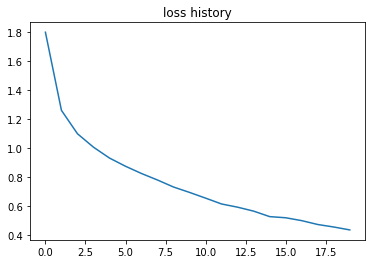

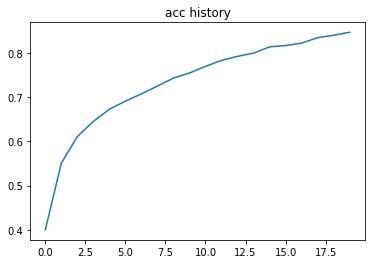

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()